In [48]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('loan_data.csv')

In [3]:
data.shape

(381, 13)

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [5]:
data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
data.shape

(308, 13)

label encoding

In [11]:
le = LabelEncoder()

In [18]:
data.Loan_Status =  le.fit_transform(data['Loan_Status'])

In [19]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


In [20]:
data.Dependents.value_counts()

Dependents
0     194
2      47
1      43
3+     24
Name: count, dtype: int64

In [21]:
data.replace({'Dependents':{'3+':4}},inplace = True)

In [22]:
data.Dependents.value_counts()

Dependents
0    194
2     47
1     43
4     24
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

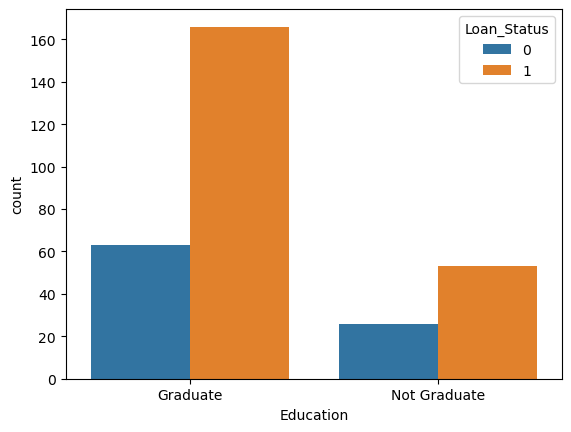

In [23]:
sns.countplot(x = 'Education', hue='Loan_Status', data = data)

<Axes: xlabel='Married', ylabel='count'>

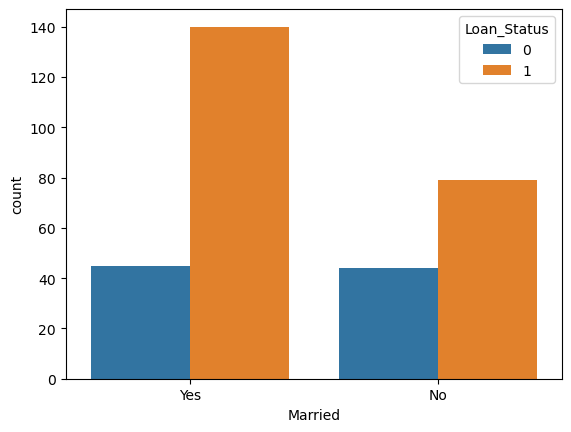

In [24]:
sns.countplot(x = 'Married', hue = 'Loan_Status', data = data)

<Axes: xlabel='Gender', ylabel='count'>

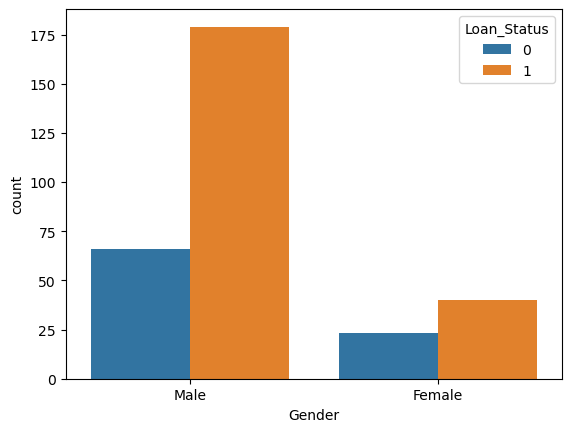

In [25]:
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = data)

In [30]:
data.replace({'Gender':{'Male':1, 'Female':0},'Education':{'Graduate':1,'Not Graduate':0},'Married':{'Yes':1,'No':0}},inplace = True)

C:\Users\chunc\AppData\Local\Temp\ipykernel_49020\2714601918.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Gender':{'Male':1, 'Female':0},'Education':{'Graduate':1,'Not Graduate':0},'Married':{'Yes':1,'No':0}},inplace = True)


In [31]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,1,1,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,1,1,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,1,0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001013,1,1,0,0,No,2333,1516.0,95.0,360.0,1.0,Urban,1


In [32]:
data.Property_Area.value_counts()

Property_Area
Semiurban    123
Urban         99
Rural         86
Name: count, dtype: int64

In [33]:
data.Property_Area = le.fit_transform(data.Property_Area)

In [34]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,1,No,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,1,Yes,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,0,No,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,1,No,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,0,No,2333,1516.0,95.0,360.0,1.0,2,1


In [35]:
data.Self_Employed.value_counts()

Self_Employed
No     280
Yes     28
Name: count, dtype: int64

In [36]:
data.Self_Employed = le.fit_transform(data.Self_Employed)

In [37]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1


In [57]:
X = data.drop(['Loan_ID','Loan_Status'],axis = 1)
Y = data['Loan_Status']

In [60]:
X.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
376,1,1,4,1,0,5703,0.0,128.0,360.0,1.0,2
377,1,1,0,1,0,3232,1950.0,108.0,360.0,1.0,0
378,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
379,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
380,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1


In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12)

In [42]:
model = svm.SVC(kernel='linear')

In [43]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [44]:
X_train_predict = model.predict(X_train)

In [46]:
X_train_accuracy = accuracy_score(X_train_predict,Y_train)

In [47]:
print('training accuracy is ',X_train_accuracy)

training accuracy is  0.8495934959349594


In [49]:
X_train_accuracy_matrix = confusion_matrix(X_train_predict,Y_train)

In [51]:
print('training data accuracy is \n',X_train_accuracy_matrix)

training data accuracy is 
 [[ 36   3]
 [ 34 173]]


In [52]:
X_test_prediction = model.predict(X_test)

In [53]:
print('accuracy for test data ',accuracy_score(X_test_prediction,Y_test))

accuracy for test data  0.7741935483870968


Making predection

In [65]:
data = np.array([0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1])
data_shape = data.reshape(1,-1)
result = model.predict(data_shape)
if(result == 1):
    print('Y')
else:
    print('N')

ValueError: X has 11 features, but SVC is expecting 2 features as input.